In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from funcs import *
plt.style.use('publication')

In [2]:
comp_time = 0.005
exp_rate = 0.2
num_workers = 1000
num_trials = 100
num_rep = 10 #Changing to 4 makes Rep beat 1 (10 in ITW 2 in ISTC)

In [3]:
# lt_decthresh = {'LT-1':np.load('encnum_1000.npy'),'LT-2':np.load('encnum_500.npy')}
# lt_degrees = {'LT-1':np.load('degrees_1000.npy'),'LT-1':2*np.load('degrees_500.npy')}

In [4]:
colors = {'One':'Black','Unc':'Orange','Rep':'Brown', 'BCC': 'Purple', 'LT':'Blue','SR-1000':'Green','CC':'Magenta'}
linestyles = {'One':'-','Unc':'--','Rep':'-.','BCC':':', 'LT':'--','SR-1000':'-','CC':':'}
markers = {'One':'s','Unc':'p','Rep':'8','BCC':'1', 'LT':'v','SR-1000':'o','CC':'^'}

In [5]:
latency_dict = {'One':[],'Unc':[],'Rep':[], 'BCC': [], 'LT':[],'SR':[]}

In [6]:
for trial in range(num_trials):
    setup_times = np.random.exponential(scale=1/exp_rate,size=num_workers)
    latency_dict['One'].append(setup_times[0]+num_workers*comp_time)
    latency_dict['Unc'].append(setup_times.max()+comp_time)
    latency_dict['Rep'].append(get_rep_time(setup_times+num_rep*comp_time,num_rep))
#     latency_dict['BCC'].append(get_bcc_time(setup_times+num_rep*comp_time,num_rep))
latency_dict['LT'] = np.load('lt_exp_1000.npy').tolist()[:100]

In [7]:
with open('SR_times.pkl', 'rb') as f:
    SR_times = pickle.load(f)
latency_dict['SR-1000'] = [time_tuple[1] for time_tuple in SR_times[1000]]

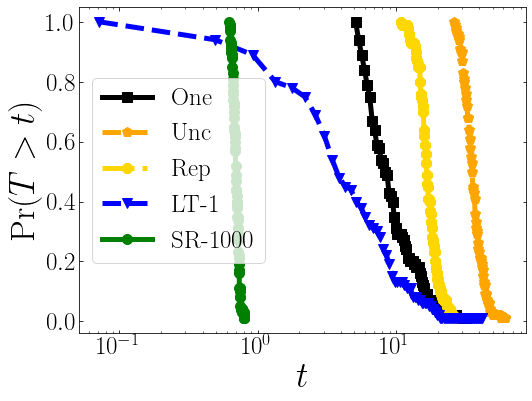

In [8]:
# latency_tails = {}
# plt.figure()
# for key in latency_dict:
#     if len(latency_dict[key])>0 and key != 'BCC':
#         tail,bin_edges = get_tail(np.asarray(latency_dict[key]))
#         plt.plot(bin_edges[:-1],tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)
# plt.xscale('log')
# plt.xlabel('$t$')
# plt.ylabel('$\Pr(T>t)$')
# plt.legend()
# plt.savefig('ITW_Plots/Plot0_latency_exp.pdf')
# plt.show()

In [ ]:
latency_tails = {}
plt.figure()
for key in latency_dict:
    if len(latency_dict[key])>0:
        tail,bin_edges = get_tail(np.asarray(latency_dict[key]))
        plt.plot(bin_edges[:-1],tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)
plt.xscale('log')
plt.xlabel('$t$')
plt.ylabel('$\Pr(T>t)$')
plt.legend()
plt.savefig('ITW_Plots/Plot1_latency_exp.pdf')
plt.show()

In [ ]:
with open('SR_inds.pkl', 'rb') as f:
    SR_inds = pickle.load(f)

In [ ]:
plt.figure()
keys = [100,400,700,1000]
sr_linestyles = ['-.','--',':','-']
sr_colors = ['gray','turquoise','gold','green']
sr_markers = ['h','H','D','o']
for ctr in range(4):
    tail,bin_edges = get_tail(np.asarray([time_tuple[1] for time_tuple in SR_times[keys[ctr]]]))
    plt.plot(bin_edges[:-1],tail,linestyle=sr_linestyles[ctr],color=sr_colors[ctr],marker=sr_markers[ctr],label='SR-'+str(keys[ctr]))
tail,bin_edges = get_tail(np.asarray(latency_dict['LT']))
plt.plot(bin_edges[:-1],tail,linestyle=linestyles['LT'],color=colors['LT'],marker=markers['LT'],label='LT') 
plt.xscale('log')
plt.xlabel('$t$')
plt.ylabel('$\Pr(T>t)$')
plt.legend()
plt.savefig('ITW_Plots/Plot2_latencycomp_exp.pdf')
plt.show()

In [ ]:
plt.figure()

key ='CC'
cc_tail, bin_edges = get_tail(np.asarray([code_tuple[0] for code_tuple in SR_inds[1000]]))
plt.plot(bin_edges[:-1],cc_tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)

key = 'SR-1000'
one_tail, bin_edges = get_tail(np.asarray([code_tuple[1] for code_tuple in SR_inds[1000]]))
plt.plot(bin_edges[:-1],one_tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)

key = 'LT'
lt_tail, bin_edges = get_tail(np.load('encnum_1000.npy')[:100])
plt.plot(bin_edges[:-1],one_tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)

# plt.xscale('log')
plt.xlabel('$m$')
plt.ylabel('$\Pr(M\'>m)$')
plt.legend()
plt.savefig('ITW_Plots/Plot3_numtails_exp.pdf')
plt.show()

In [12]:
latency_dict = {'One':[],'Unc':[],'Rep':[], 'BCC': [], 'LT':[],'SR-1000':[]}

In [13]:
for trial in range(num_trials):
    setup_times = 1.0+np.random.pareto(a=1,size=num_workers)
    latency_dict['One'].append(setup_times[0]+num_workers*comp_time)
    latency_dict['Unc'].append(setup_times.max()+comp_time)
    latency_dict['Rep'].append(get_rep_time(setup_times+num_rep*comp_time,num_rep))
    latency_dict['BCC'].append(get_bcc_time(setup_times+num_rep*comp_time,num_rep))
latency_dict['LT'] = np.load('lt_par_1000.npy').tolist()[:100]

In [14]:
with open('SR_times_par.pkl', 'rb') as f:
    SR_times = pickle.load(f)
latency_dict['SR-1000'] = [time_tuple[1] for time_tuple in SR_times[1000]]

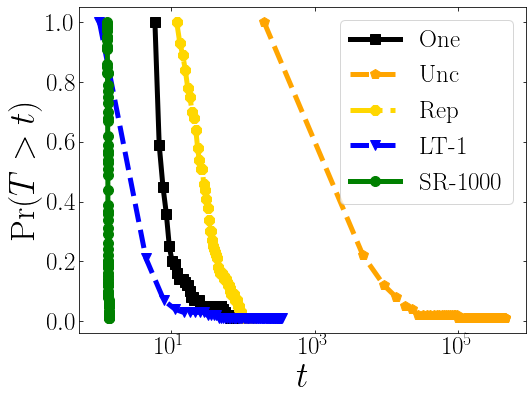

In [15]:
# latency_tails = {}
# plt.figure()
# for key in latency_dict:
#     if len(latency_dict[key])>0 and key != 'BCC':
#         tail,bin_edges = get_tail(np.asarray(latency_dict[key]))
#         plt.plot(bin_edges[:-1],tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)
# plt.xscale('log')
# plt.xlabel('$t$')
# plt.ylabel('$\Pr(T>t)$')
# plt.legend()
# plt.savefig('ITW_Plots/Plot0_latency_par.pdf')
# plt.show()

In [ ]:
latency_tails = {}
plt.figure()
for key in latency_dict:
    if len(latency_dict[key])>0:
        tail,bin_edges = get_tail(np.asarray(latency_dict[key]))
        plt.plot(bin_edges[:-1],tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)
plt.xscale('log')
plt.xlabel('$t$')
plt.ylabel('$\Pr(T>t)$')
plt.legend()
plt.savefig('ITW_Plots/Plot1_latency_par.pdf')
plt.show()

In [ ]:
with open('SR_inds_par.pkl', 'rb') as f:
    SR_inds = pickle.load(f)

In [ ]:
plt.figure()
keys = [100,400,700,1000]
sr_linestyles = ['-.','--',':','-']
sr_colors = ['gray','turquoise','gold','green']
sr_markers = ['h','H','D','o']
for ctr in range(4):
    tail,bin_edges = get_tail(np.asarray([time_tuple[1] for time_tuple in SR_times[keys[ctr]]]))
    plt.plot(bin_edges[:-1],tail,linestyle=sr_linestyles[ctr],color=sr_colors[ctr],marker=sr_markers[ctr],label='SR-'+str(keys[ctr]))
tail,bin_edges = get_tail(np.asarray(latency_dict['LT']))
plt.plot(bin_edges[:-1],tail,linestyle=linestyles['LT'],color=colors['LT'],marker=markers['LT'],label='LT') 
plt.xscale('log')
plt.xlabel('$t$')
plt.ylabel('$\Pr(T>t)$')
plt.legend()
plt.savefig('ITW_Plots/Plot2_latencycomp_par.pdf')
plt.show()

In [ ]:
plt.figure()

key ='CC'
cc_tail, bin_edges = get_tail(np.asarray([code_tuple[0] for code_tuple in SR_inds[1000]]))
plt.plot(bin_edges[:-1],cc_tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)

key = 'SR-1000'
one_tail, bin_edges = get_tail(np.asarray([code_tuple[1] for code_tuple in SR_inds[1000]]))
plt.plot(bin_edges[:-1],one_tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)

key = 'LT'
lt_tail, bin_edges = get_tail(np.load('encnum_1000.npy')[:100])
plt.plot(bin_edges[:-1],one_tail,linestyle=linestyles[key],color=colors[key],marker=markers[key],label=key)

# plt.xscale('log')
plt.xlabel('$m$')
plt.ylabel('$\Pr(M\'>m)$')
plt.legend()
plt.savefig('ITW_Plots/Plot3_numtails_par.pdf')
plt.show()